# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [7]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi.newsapi_client import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [8]:
# Read your api key environment variable
# Load .env enviroment variables
load_dotenv()

True

In [9]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [10]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    from_param = '2020-12-01',
    to = '2020-12-11',
    page_size=2,
    sort_by="relevancy"
)

In [11]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    from_param = '2020-12-01',
    to = '2020-12-11',
    page_size=2,
    sort_by="relevancy"
)

In [12]:
ethereum_headlines

{'status': 'ok',
 'totalResults': 507,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Gertrude Chavez-Dreyfuss',
   'title': 'Crypto fund inflows hit second highest on record, assets managed surge: Coinshares - Reuters UK',
   'description': "Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second highest on record, pushing the sector's assets under management to an all-time peak of $15 billion, according to Monday's data from digita…",
   'url': 'https://uk.reuters.com/article/us-crypto-currencies-inflows-idUKKBN28H2OY',
   'urlToImage': 'https://s1.reutersmedia.net/resources_v2/images/rcom-default.png?w=800',
   'publishedAt': '2020-12-07T20:26:00Z',
   'content': 'NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second highest on record, pushing the sectors assets under manag… [+1888 chars]'},
  {'source'

In [13]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.6369,0.0,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.0000,0.0,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [14]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...
1,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...


In [15]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,2.000000,2.0,2.000000,2.000000
mean,0.318450,0.0,0.919000,0.081000
std,0.450356,0.0,0.114551,0.114551
min,0.000000,0.0,0.838000,0.000000
25%,0.159225,0.0,0.878500,0.040500
50%,0.318450,0.0,0.919000,0.081000
75%,0.477675,0.0,0.959500,0.121500
max,0.636900,0.0,1.000000,0.162000


In [16]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,2.0000,2.0,2.000,2.000
mean,0.1779,0.0,0.948,0.052
std,0.0000,0.0,0.000,0.000
min,0.1779,0.0,0.948,0.052
25%,0.1779,0.0,0.948,0.052
50%,0.1779,0.0,0.948,0.052
75%,0.1779,0.0,0.948,0.052
max,0.1779,0.0,0.948,0.052


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

In [18]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))
sw_addon = {'said', 'mln', 'kilolitres','kl', 'char'}
sw_final = sw.union(sw_addon)

In [70]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Clean text
    regex = re.compile("[^a-zA-Z ]")
    clean_text = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(clean_text)
    
#     # Create a list of the words
#     sentences = sent_tokenize(clean_text)
#     words = []
#     for sentence in sentences:
#         words += word_tokenize(sentence)
    
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
    # Remove the punctuation
    
    
    # Remove the stop words
    words = [word for word in words if word not in sw]
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens


In [71]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = [tokenizer(text) for text in bitcoin_df['text']]
bitcoin_df

,compound,negative,neutral,positive,text,tokens
0,0.6369,0.0,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
1,0.0000,0.0,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [33]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = [tokenizer(text) for text in ethereum_df['text']]
ethereum_df

,compound,negative,neutral,positive,text,tokens
0,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, reuters, institutional, investor, ..."
1,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, reuters, institutional, investor, ..."


In [62]:
# Create collections of cleaned words for following analysis
bitcoin_all_words = []
ethereum_all_words = []

for tokens in bitcoin_df['tokens']:
    bitcoin_all_words += tokens

for tokens in ethereum_df['tokens']:
    ethereum_all_words += tokens

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [35]:
from collections import Counter
from nltk import ngrams

In [72]:
# Generate the Bitcoin N-grams where N=2
bigram_counts = Counter(ngrams(bitcoin_df.loc[1,'tokens'], n=2))
print(dict(bigram_counts))

{('unlike', 'conventional'): 1, ('conventional', 'cryptocurrencies'): 1, ('cryptocurrencies', 'central'): 1, ('central', 'bank'): 1, ('bank', 'control'): 1, ('control', 'digital'): 1, ('digital', 'yuan'): 1, ('yuan', 'case'): 1, ('case', 'people'): 1, ('people', 'bank'): 1, ('bank', 'china'): 1, ('china', 'move'): 1, ('move', 'give'): 1, ('give', 'country'): 1, ('country', 'power'): 1, ('power', 'theory'): 1, ('theory', 'stability'): 1, ('stability', 'freq'): 1, ('freq', 'char'): 1}


In [39]:
# Generate the Ethereum N-grams where N=2
bigram_counts = Counter(ngrams(ethereum_df.loc[1,'tokens'], n=2))
print(dict(bigram_counts))

{('new', 'york'): 1, ('york', 'reuters'): 1, ('reuters', 'institutional'): 1, ('institutional', 'investor'): 1, ('investor', 'pumped'): 1, ('pumped', 'million'): 1, ('million', 'cryptocurrency'): 1, ('cryptocurrency', 'fund'): 1, ('fund', 'product'): 1, ('product', 'week'): 1, ('week', 'ended'): 1, ('ended', 'dec'): 1, ('dec', 'second'): 1, ('second', 'highest'): 1, ('highest', 'record'): 1, ('record', 'pushing'): 1, ('pushing', 'sector'): 1, ('sector', 'asset'): 1, ('asset', 'manag'): 1, ('manag', 'char'): 1}


In [41]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [48]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_all_words)

[('char', 2),
 ('bank', 2),
 ('visahas', 1),
 ('partnered', 1),
 ('cryptocurrency', 1),
 ('startup', 1),
 ('blockfi', 1),
 ('offer', 1),
 ('first', 1),
 ('reward', 1)]

In [49]:
# Get the top 10 words for Ethereum
token_count(ethereum_all_words)

[('new', 2),
 ('york', 2),
 ('reuters', 2),
 ('institutional', 2),
 ('investor', 2),
 ('pumped', 2),
 ('million', 2),
 ('cryptocurrency', 2),
 ('fund', 2),
 ('product', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

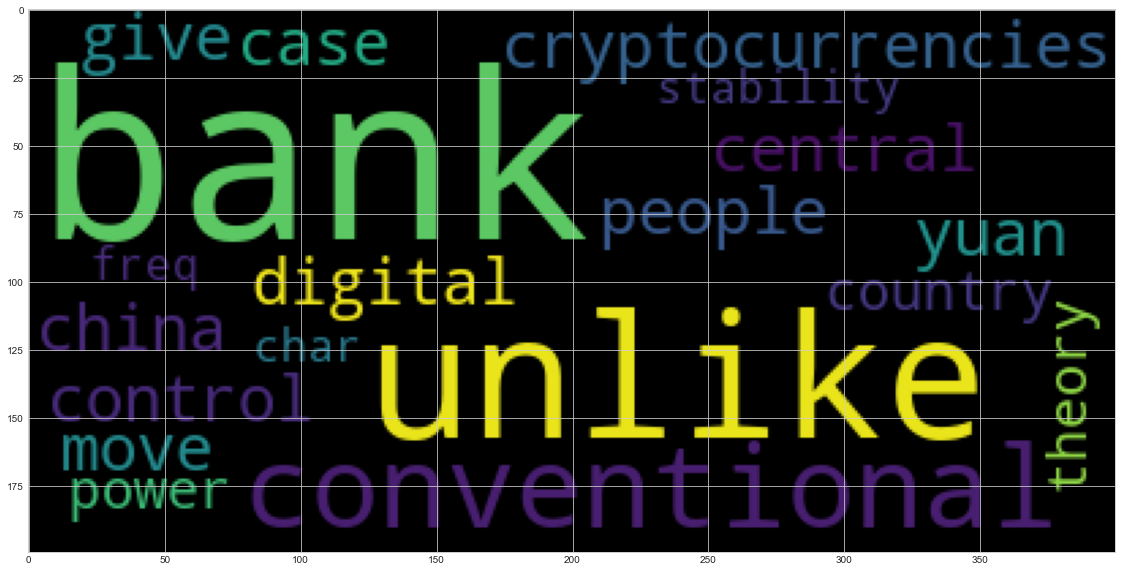

In [77]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin_df.loc[1,'tokens'])
wc = WordCloud().generate(big_string)
plt.imshow(wc)

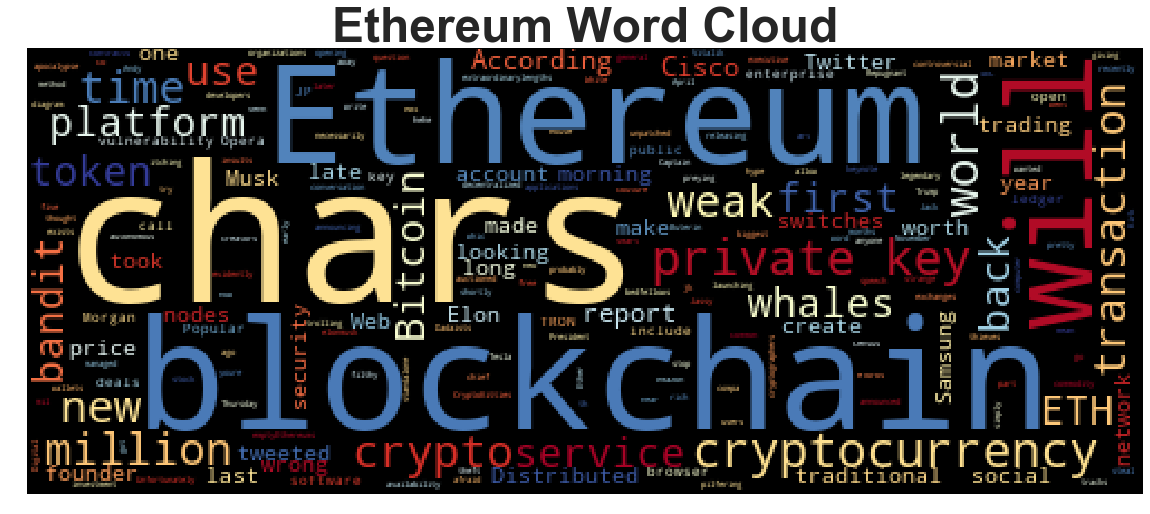

In [26]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [78]:
import spacy
from spacy import displacy

In [79]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [80]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [83]:
# Concatenate all of the bitcoin text together
bitcoin_all_text = ' '.join(bitcoin_df['text'])
bitcoin_all_text

'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the country more power and, in theory, more stability than freq… [+366 chars]'

In [86]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_all_text)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin NER'

In [87]:
# Render the visualization
displacy.render(doc, style='ent')

In [90]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Visa ORG
first ORDINAL
Bitcoin GPE
digital yuan ORG
the People’s Bank of China ORG


---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [36]:
# Render the visualization
# YOUR CODE HERE!

In [37]:
# List all Entities
# YOUR CODE HERE!

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f